In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
import seaborn as sns
sns.set()
sns.set(style="whitegrid", color_codes=True)
from tqdm.notebook import tqdm
tqdm.pandas()

In [2]:
csv_akam = "C:/Business analysis/Project/IS403.O22.HTCLL_Nhom07/Dataset/AKAM_Stock.csv"
df_akam = pd.read_csv(csv_akam, thousands=',')

In [3]:
df_akam.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,3/1/2019,AKAM,71.089996,71.089996,71.489998,69.739998,70.059998,1633700
1,3/4/2019,AKAM,70.290001,70.290001,71.790001,69.709999,71.550003,995000
2,3/5/2019,AKAM,70.550003,70.550003,70.989998,69.800003,70.209999,1282100
3,3/6/2019,AKAM,71.540001,71.540001,71.680000,70.510002,70.620003,1658400
4,3/7/2019,AKAM,70.470001,70.470001,71.150002,70.019997,71.089996,1353400


In [4]:
df_akam.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1.324000e+03
mean,98.894456,98.894456,99.920030,97.838044,98.871488,1.582324e+06
std,13.155544,13.155544,13.238076,13.092423,13.186564,9.565868e+05
min,69.120003,69.120003,69.260002,67.279999,68.230003,2.774000e+05
25%,88.715000,88.715000,89.742500,87.667500,88.660004,1.043800e+06
50%,100.404999,100.404999,101.779999,99.184998,100.419998,1.350500e+06
75%,110.002501,110.002501,111.330000,108.862501,109.972502,1.799050e+06
max,128.320007,128.320007,129.169998,126.980003,128.550003,1.077170e+07


In [5]:
df_akam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1324 non-null   object 
 1   Symbol     1324 non-null   object 
 2   Adj Close  1324 non-null   float64
 3   Close      1324 non-null   float64
 4   High       1324 non-null   float64
 5   Low        1324 non-null   float64
 6   Open       1324 non-null   float64
 7   Volume     1324 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 82.9+ KB


In [6]:
# Convert object to datetime64
df_akam['Date'] = df_akam['Date'].apply(pd.to_datetime)
# Sort data by date time value
df_akam = df_akam.sort_values(by="Date").reset_index(drop=True)
df_akam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1324 non-null   datetime64[ns]
 1   Symbol     1324 non-null   object        
 2   Adj Close  1324 non-null   float64       
 3   Close      1324 non-null   float64       
 4   High       1324 non-null   float64       
 5   Low        1324 non-null   float64       
 6   Open       1324 non-null   float64       
 7   Volume     1324 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 82.9+ KB


In [7]:
df_akam.Close

0       71.089996
1       70.290001
2       70.550003
3       71.540001
4       70.470001
          ...    
1319    92.589996
1320    90.839996
1321    90.220001
1322    92.239998
1323    90.900002
Name: Close, Length: 1324, dtype: float64

In [8]:
df_akam['Prev_close'] = df_akam.shift(1)['Close']
df_akam.Prev_close

0             NaN
1       71.089996
2       70.290001
3       70.550003
4       71.540001
          ...    
1319    94.139999
1320    92.589996
1321    90.839996
1322    90.220001
1323    92.239998
Name: Prev_close, Length: 1324, dtype: float64

In [9]:
df_akam.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Prev_close
0,2019-03-01,AKAM,71.089996,71.089996,71.489998,69.739998,70.059998,1633700,NaN
1,2019-03-04,AKAM,70.290001,70.290001,71.790001,69.709999,71.550003,995000,71.089996
2,2019-03-05,AKAM,70.550003,70.550003,70.989998,69.800003,70.209999,1282100,70.290001
3,2019-03-06,AKAM,71.540001,71.540001,71.680000,70.510002,70.620003,1658400,70.550003
4,2019-03-07,AKAM,70.470001,70.470001,71.150002,70.019997,71.089996,1353400,71.540001


In [10]:
df_akam['Close_change'] = df_akam.progress_apply(
    lambda row: 0 if np.isnan(row.Prev_close) else row.Close - row.Prev_close,
    axis = 1
)

  0%|          | 0/1324 [00:00<?, ?it/s]

In [11]:
df_akam.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Prev_close,Close_change
0,2019-03-01,AKAM,71.089996,71.089996,71.489998,69.739998,70.059998,1633700,NaN,0.000000
1,2019-03-04,AKAM,70.290001,70.290001,71.790001,69.709999,71.550003,995000,71.089996,-0.799995
2,2019-03-05,AKAM,70.550003,70.550003,70.989998,69.800003,70.209999,1282100,70.290001,0.260002
3,2019-03-06,AKAM,71.540001,71.540001,71.680000,70.510002,70.620003,1658400,70.550003,0.989998
4,2019-03-07,AKAM,70.470001,70.470001,71.150002,70.019997,71.089996,1353400,71.540001,-1.070000


In [12]:
rows = []
for _,row in tqdm(df_akam.iterrows(), total=df_akam.shape[0]):
    row_data = dict(
        date = row.Date,
        open = row.Open,
        low = row.Close,
        high = row.High, 
        close = row.Close, 
        volume = row.Volume,
        close_change = row.Close_change
    )
    rows.append(row_data)
features_akam = pd.DataFrame(rows)

  0%|          | 0/1324 [00:00<?, ?it/s]

In [13]:
features_akam.head()

,date,open,low,high,close,volume,close_change
0,2019-03-01,70.059998,71.089996,71.489998,71.089996,1633700,0.000000
1,2019-03-04,71.550003,70.290001,71.790001,70.290001,995000,-0.799995
2,2019-03-05,70.209999,70.550003,70.989998,70.550003,1282100,0.260002
3,2019-03-06,70.620003,71.540001,71.680000,71.540001,1658400,0.989998
4,2019-03-07,71.089996,70.470001,71.150002,70.470001,1353400,-1.070000


In [14]:
def detect_outlier(df, col):
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(df[(df[col] < lower_bound) | (df[col] > upper_bound)])

In [15]:
detect_outlier(features_akam, 'close')

Empty DataFrame
Columns: [date, open, low, high, close, volume, close_change]
Index: []


In [16]:
detect_outlier(features_akam, 'volume')

           date        open         low        high       close   volume   
42   2019-05-01   86.010002   81.040001   86.190002   81.040001  4597600  \
78   2019-06-21   79.809998   78.550003   80.000000   78.550003  3469700   
105  2019-07-31   85.000000   88.129997   90.760002   88.129997  4730100   
106  2019-08-01   88.120003   90.110001   90.360001   90.110001  2975100   
115  2019-08-14   88.080002   84.080002   88.080002   84.080002  5810800   
...         ...         ...         ...         ...         ...      ...   
1269 2024-03-15  108.279999  107.250000  108.900002  107.250000  2957800   
1307 2024-05-09  102.099998  102.459999  102.650002  102.459999  3679100   
1308 2024-05-10   94.199997   91.190002   94.820000   91.190002  9731100   
1309 2024-05-13   91.470001   94.320000   94.730003   94.320000  3462400   
1322 2024-05-31   90.120003   92.239998   92.410004   92.239998  3298500   

      close_change  
42        0.980003  
78       -1.329994  
105       4.099998  
106

In [17]:
detect_outlier(features_akam, 'close_change')

           date        open         low        high       close   volume   
105  2019-07-31   85.000000   88.129997   90.760002   88.129997  4730100  \
108  2019-08-05   86.559998   84.010002   86.949997   84.010002  2371300   
115  2019-08-14   88.080002   84.080002   88.080002   84.080002  5810800   
247  2020-02-24   97.099998   97.110001   98.540001   97.110001  1514100   
248  2020-02-25   97.620003   93.730003   98.320000   93.730003  1293900   
...         ...         ...         ...         ...         ...      ...   
1056 2023-05-10   83.199997   85.540001   86.500000   85.540001  4274500   
1118 2023-08-09  101.500000  102.989998  107.470001  102.989998  5637200   
1248 2024-02-14  119.120003  114.800003  122.000000  114.800003  7080500   
1249 2024-02-15  114.199997  111.570000  114.669998  111.570000  4018200   
1308 2024-05-10   94.199997   91.190002   94.820000   91.190002  9731100   

      close_change  
105       4.099998  
108      -4.309998  
115      -5.290001  
247

In [18]:
features_akam = features_akam.set_index("date")
features_akam.head()

,open,low,high,close,volume,close_change
date,,,,,,
2019-03-01,70.059998,71.089996,71.489998,71.089996,1633700,0.000000
2019-03-04,71.550003,70.290001,71.790001,70.290001,995000,-0.799995
2019-03-05,70.209999,70.550003,70.989998,70.550003,1282100,0.260002
2019-03-06,70.620003,71.540001,71.680000,71.540001,1658400,0.989998
2019-03-07,71.089996,70.470001,71.150002,70.470001,1353400,-1.070000


In [19]:
train_size = int(0.8 * len(features_akam))
test_size = len(features_akam)-train_size

train_akam_df = features_akam[:train_size]
test_akam_df = features_akam[train_size:]

Text(0.5, 1.0, 'Time Series Plots of akam stock')

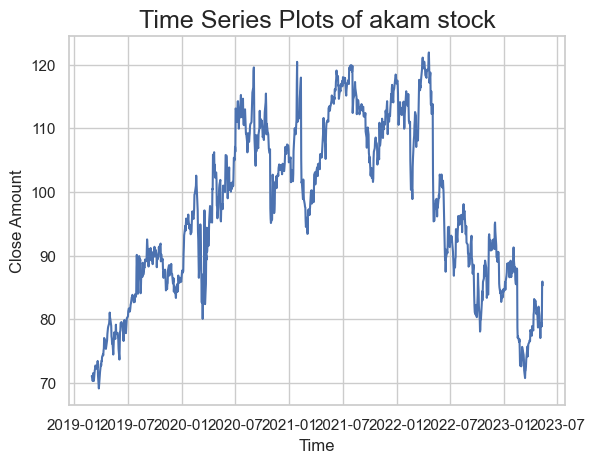

In [20]:
fig, ax = plt.subplots()
ax.plot(train_akam_df.index, train_akam_df['close'])
ax.set_ylabel('Close Amount')
ax.set_xlabel('Time')
ax.set_title('Time Series Plots of akam stock', size=18)

The additive method is useful when the trend and seasonal variation is relatively constant over time as shown below whereas the multiplicative method is useful when the trend and seasonal variation increases or decreases in magnitude over time

Text(0.5, 0, 'Y')

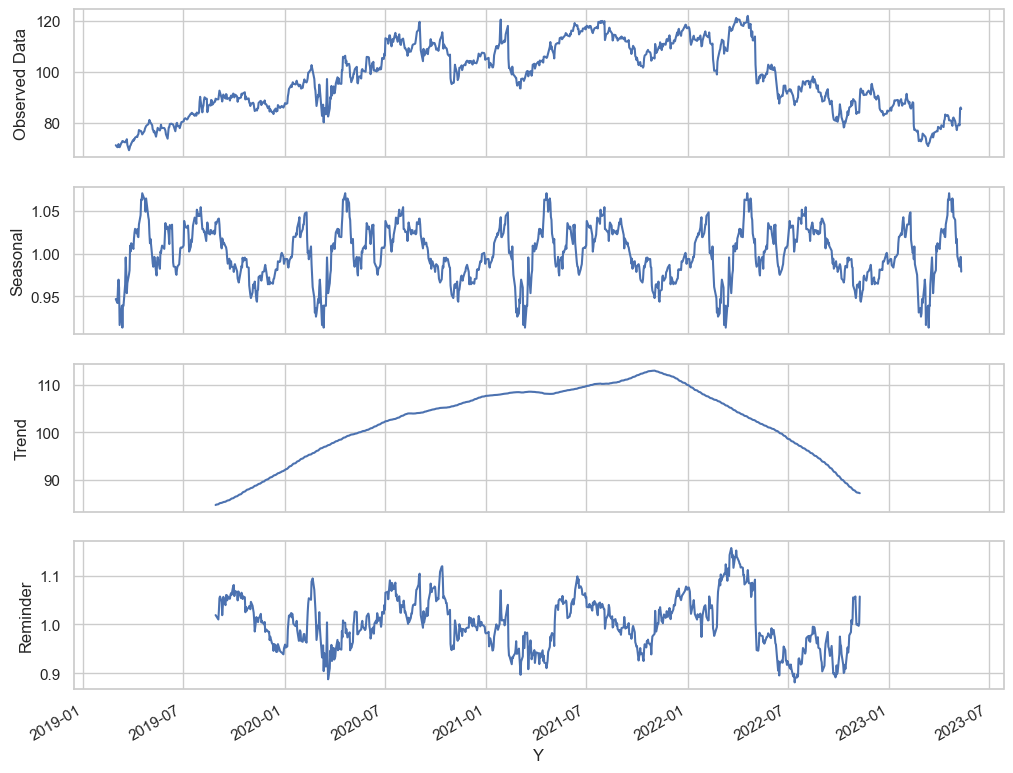

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(train_akam_df['close'], model='multiplicative', period=252)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(12,10), sharex= True)
res.observed.plot(ax=ax1)
ax1.set_ylabel('Observed Data')
res.seasonal.plot(ax=ax2)
ax2.set_ylabel('Seasonal')
res.trend.plot(ax=ax3)
ax3.set_ylabel('Trend')
res.resid.plot(ax=ax4)
ax4.set_ylabel('Reminder')

plt.xlabel("Y")

In [22]:
# Define your parameter grid
param_grid = {
    'error': ['add', 'mul'],
    'trend': ['add', None],
    'damped_trend': [False, True],
    'seasonal': ['add', None, 'mul'],
    'seasonal_periods': [14, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 365]
}

# Initialize variables to store the best score, parameters, and model
best_aic = float('inf')
best_params = None
best_model = None

# Ensure the data passed to ETSModel is 1-dimensional and has date index with frequency
train_series = pd.Series(train_akam_df['close'].values, index=pd.date_range(start=train_akam_df.index[0], periods=len(train_akam_df), freq='D'))
test_series = pd.Series(test_akam_df['close'].values, index=pd.date_range(start=test_akam_df.index[0], periods=len(test_akam_df), freq='D'))

# Iterate over all combinations of parameters
for error in param_grid['error']:
    for trend in param_grid['trend']:
        damped_trend_values = [False] if trend is None else param_grid['damped_trend']
        for damped_trend in damped_trend_values:
            for seasonal in param_grid['seasonal']:
                for seasonal_periods in param_grid['seasonal_periods']:
                    try:
                        # Skip the excluded cases
                        if (error == 'add' and trend is None and seasonal == 'mul') or \
                           (error == 'add' and trend == 'add' and seasonal == 'mul') or \
                           (error == 'add' and damped_trend and seasonal == 'mul'):
                            continue
                        # Check if seasonal_periods is valid with the given seasonal component
                        if seasonal is None and seasonal_periods is not None:
                            continue
                        
                        # Define and fit the model
                        model = ETSModel(train_series, 
                                         error=error,
                                         trend=trend,
                                         damped_trend=damped_trend, 
                                         seasonal=seasonal, 
                                         seasonal_periods=seasonal_periods,
                                         initialization_method='heuristic')
                        model_fit = model.fit()

                        # Make predictions with date index preserved
                        # Get AIC score
                        aic_score = model_fit.aic
                        
                        # Update the best model if the current one has lower AIC
                        if aic_score < best_aic:
                            best_aic = aic_score
                            best_params = {
                                'error': error,
                                'trend': trend,
                                'damped_trend': damped_trend,
                                'seasonal': seasonal,
                                'seasonal_periods': seasonal_periods
                            }
                            best_model = model_fit

                    except Exception as e:
                        print(f"An error occurred for parameters (error={error}, trend={trend}, damped_trend={damped_trend}, seasonal={seasonal}, seasonal_periods={seasonal_periods}): {e}")
                        continue

# Output the best model's AIC
if best_model is not None:
    print('Best model')
    print(f"Best Parameters: {best_params}")
    print(f"Best AIC: {best_aic}")

Best model
Best Parameters: {'error': 'add', 'trend': None, 'damped_trend': False, 'seasonal': 'add', 'seasonal_periods': 210}
Best AIC: 4091.675581327687


In [23]:
# Quá trình testing
# Forecast the values for the test set
test_predictions = best_model.predict(start=len(train_akam_df), end=len(train_akam_df) + len(test_akam_df) - 1 )
test_dates = pd.Series(test_akam_df.index)  # Adjust freq as per your data
y_pred = test_predictions
test_predictions.index = test_dates
# Output the forecasted values for the test set
print("Test Set Predictions:")
print(test_predictions)

Test Set Predictions:
date
2023-05-15    84.586836
2023-05-16    84.957503
2023-05-17    85.439113
2023-05-18    86.884961
2023-05-19    86.154336
                ...    
2024-05-28    85.427384
2024-05-29    88.329997
2024-05-30    88.562039
2024-05-31    87.686671
2024-06-03    86.735009
Length: 265, dtype: float64


In [24]:
#Evaluating algorithm accuracy using
y_test = test_akam_df['close']
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
print('Testing MAE:', test_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Testing MAPE:', test_mape)

Testing RMSE: 18.015037515096328
Testing MAE: 15.922526798127475
Testing MAPE: 0.14592705234448652


In [25]:
#Predict the closing prices for the next 30 days
forecast_horizon = 30
forecast_dates = pd.date_range(start=features_akam.index[-1] + pd.Timedelta(days=1), periods=forecast_horizon)
forecast_30_days = best_model.predict(start=len(features_akam), end=len(features_akam) + forecast_horizon - 1)
forecast_30_days.index = forecast_dates
print(forecast_30_days)

2024-06-04    86.498056
2024-06-05    87.006926
2024-06-06    88.726414
2024-06-07    89.079318
2024-06-08    88.838005
2024-06-09    89.758081
2024-06-10    88.843699
2024-06-11    85.110187
2024-06-12    85.903136
2024-06-13    87.035777
2024-06-14    87.322669
2024-06-15    89.121061
2024-06-16    89.401966
2024-06-17    87.757605
2024-06-18    87.791605
2024-06-19    88.056051
2024-06-20    88.366651
2024-06-21    88.490096
2024-06-22    87.978432
2024-06-23    87.674713
2024-06-24    88.004789
2024-06-25    86.425642
2024-06-26    86.793432
2024-06-27    87.568290
2024-06-28    86.957823
2024-06-29    87.088426
2024-06-30    86.094753
2024-07-01    86.104193
2024-07-02    86.548988
2024-07-03    88.215306
Freq: D, dtype: float64


In [26]:
#Predict the closing prices for the next 60 days
forecast_horizon = 60
forecast_dates = pd.date_range(start=features_akam.index[-1] + pd.Timedelta(days=1), periods=forecast_horizon)
forecast_60_days = best_model.predict(start=len(features_akam), end=len(features_akam) + forecast_horizon - 1)
forecast_60_days.index = forecast_dates
print(forecast_60_days)

2024-06-04    86.498056
2024-06-05    87.006926
2024-06-06    88.726414
2024-06-07    89.079318
2024-06-08    88.838005
2024-06-09    89.758081
2024-06-10    88.843699
2024-06-11    85.110187
2024-06-12    85.903136
2024-06-13    87.035777
2024-06-14    87.322669
2024-06-15    89.121061
2024-06-16    89.401966
2024-06-17    87.757605
2024-06-18    87.791605
2024-06-19    88.056051
2024-06-20    88.366651
2024-06-21    88.490096
2024-06-22    87.978432
2024-06-23    87.674713
2024-06-24    88.004789
2024-06-25    86.425642
2024-06-26    86.793432
2024-06-27    87.568290
2024-06-28    86.957823
2024-06-29    87.088426
2024-06-30    86.094753
2024-07-01    86.104193
2024-07-02    86.548988
2024-07-03    88.215306
2024-07-04    89.016325
2024-07-05    88.490182
2024-07-06    88.133259
2024-07-07    87.699773
2024-07-08    88.986677
2024-07-09    89.036330
2024-07-10    88.400526
2024-07-11    89.209220
2024-07-12    89.618395
2024-07-13    89.953385
2024-07-14    90.022035
2024-07-15    90

In [27]:
#Predict the closing prices for the next 90 days
forecast_horizon = 90
forecast_dates = pd.date_range(start=features_akam.index[-1] + pd.Timedelta(days=1), periods=forecast_horizon)
forecast_90_days = best_model.predict(start=len(features_akam), end=len(features_akam) + forecast_horizon - 1)
forecast_90_days.index = forecast_dates
print(forecast_90_days)

2024-06-04    86.498056
2024-06-05    87.006926
2024-06-06    88.726414
2024-06-07    89.079318
2024-06-08    88.838005
                ...    
2024-08-28    97.124094
2024-08-29    97.437498
2024-08-30    97.120214
2024-08-31    96.680534
2024-09-01    96.219229
Freq: D, Length: 90, dtype: float64


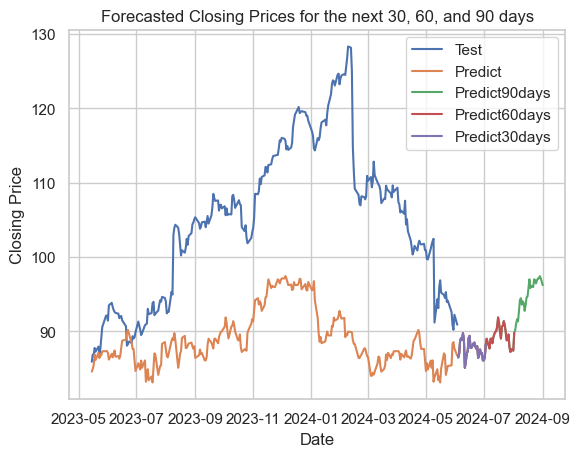

In [28]:
#Vẽ hình
plt.plot(test_akam_df['close'])
plt.plot(test_predictions)
plt.plot(forecast_90_days)
plt.plot(forecast_60_days)
plt.plot(forecast_30_days)
plt.legend(['Test','Predict','Predict90days', 'Predict60days', 'Predict30days'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Forecasted Closing Prices for the next 30, 60, and 90 days')
plt.grid(True)
plt.show()